Q1) data matrix 𝚽 with no.of samples as variable n and feature dimension as variable m

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time 

In [2]:
def data_matrix(n,m):
  phi=np.random.randint(0,5,size=(n,m)) #giving random values between 0 and 5 for matrix entries
  return phi

In [3]:

n=500
m=10
phi=data_matrix(n,m) #generate a data matrix with n rows and m columns

phi.shape

(500, 10)

Q2) A function to generate the dependent variable column 't' with inputs as data matrix, weight vector, bias weight and noise variance. 

Here, tar_var = Σ w_j Φ_j(x) + w0 + Gaussian Noise = Φ.w + w0 + GN


In [4]:
def tar_var(X,w,w0,nos_var):
  X_init=np.ones((len(X),len(X[0])+1)) #construncting a matrix full of ones such that ,
                                       #random matrix can be included in this with one extra column left in this matrix for w0 bias
  X_init[:,1:len(X[0])+1]=X            #changing rows and columns of matrix of ones into the given matrix
  w_init=np.ones((len(w)+1,1))         #similarly weight matrix with one extra row for w0
  w_init[1:len(X[0])+1,:]=1            #changing w of full ones to given weight vector
  w_init[0:1,:]=w0                     #giving w0 to first row of weight vector
  t=np.dot(X_init,w_init)+np.random.normal(0,np.sqrt(nos_var),((len(X),1))) #generating target variable from the above formula in the text
  return t #returning it to a function

In [5]:
w=np.random.rand(m,1) #generating random matrix with m rows and 1 column
w0=np.random.rand() #generate a random value
stand_dev=np.random.rand() # generate a random value for noise variance
tv=tar_var(phi,w,w0,stand_dev)#tv=target_variable
tv.shape,w.shape

((500, 1), (10, 1))

Q3)Function for linear regression estimate just by multiplying matrix 𝚽 that contains number of samples and number of features, with weight matrix

𝚽 be the the data matrix and w be the weights matrix

In [6]:
def lin_reg_es(X,w):
  y = np.dot(X,w) # y is just the dot product of data matrix X and weights w
  return y

In [7]:
lr_es=lin_reg_es(phi,w) #lr_est=linear_regression_esitimate
lr_es

array([[ 7.72120931],
       [10.72244043],
       [ 8.1841364 ],
       [ 7.58490072],
       [13.83824351],
       [ 9.85645249],
       [ 6.51285872],
       [11.1826204 ],
       [ 9.80603159],
       [ 6.06341648],
       [ 8.30372474],
       [10.85236089],
       [12.91180995],
       [10.58442393],
       [ 9.04195617],
       [11.70797053],
       [ 7.90934186],
       [ 6.97201908],
       [11.10552412],
       [ 4.01145684],
       [ 9.43805016],
       [10.8774256 ],
       [ 9.38559701],
       [ 8.97320101],
       [ 6.85299079],
       [13.79647017],
       [11.79335693],
       [ 9.78048453],
       [11.2265971 ],
       [ 7.62601734],
       [ 8.58395341],
       [ 8.40152531],
       [ 5.59437595],
       [ 7.81978782],
       [12.42189555],
       [ 7.24134378],
       [ 6.95485561],
       [ 8.89461603],
       [ 5.21481017],
       [ 8.67487898],
       [ 7.25068678],
       [ 9.19831211],
       [11.27193802],
       [ 7.4866282 ],
       [ 5.13017083],
       [ 4

Q4) Function to compute mean square error of vectors y and t
 the function will be \((y-t)^2\)


In [8]:
def mean_square_error(y,t):
  mse=np.mean((y-t)**2) #defining mean square error between y and t as this formula
  return mse


In [9]:
mean_sq_err=mean_square_error(lr_es,tv) # calling the function mean_square _error
mean_sq_err

139.90120289267296

Q5)Function to estimate the weights of linear regression using pseudo-inverse, assuming L2 reguralisation

For this we first need to find the estimated weights

weight_est=((λI+𝚽ᵀ𝚽)\^(-1))𝚽t

then from this we get y=𝚽*w, mean square error from it



In [10]:
def linear_regression_estimate_l2norm(X,t,l):
  n=len(X)           #labelling no of rows in X as n
  m=len(X[0])        #labelling no of columns in X as m
  w0=np.random.rand()#generating random w0 value between 0 and 1
  i=np.eye(m+1,m+1) #https://www.geeksforgeeks.org/numpy-eye-python/
  X_init=np.ones((n,m+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
  X_init[:,1:]=X
  w_e=np.dot(np.linalg.inv(l*i+np.dot(X_init.T,X_init)),np.dot(X_init.T,t)) #defining the function to 
                                                                            #get estimated weights using pseudo inverse method as in the above text
  y=np.dot(X_init,w_e)#see above
  mse=np.mean(np.square(y-t))#finding mean square error between y and t
  return [w_e,mse,y]


In [11]:
l=10

lin_reg_est_l2=linear_regression_estimate_l2norm(phi,tv,l)#calling the function of linear regression estimate using pseudo inverse method
lin_reg_est_l2

[array([[0.22351973],
        [1.00352671],
        [1.03318002],
        [0.98173474],
        [1.01555931],
        [0.99042255],
        [0.99750382],
        [0.96175585],
        [0.99225314],
        [1.02248043],
        [1.01296114]]), 0.6025684133519356, array([[19.27795311],
        [27.33133915],
        [19.23632083],
        [20.15866454],
        [31.14756334],
        [26.2543227 ],
        [20.218157  ],
        [24.2368471 ],
        [22.26204967],
        [16.12745127],
        [19.25359177],
        [19.37741507],
        [29.26312287],
        [19.36795464],
        [18.32243023],
        [20.34184092],
        [12.38686243],
        [18.03770368],
        [26.12238882],
        [ 8.23511104],
        [20.37367088],
        [27.1955946 ],
        [23.23631537],
        [20.17517521],
        [17.17291333],
        [30.23135684],
        [27.20760227],
        [17.27129594],
        [22.18693556],
        [15.32088932],
        [19.25311171],
        [15.26094914],
 

Q6)Function to compute gradient of MSE with respect to its weight vector
 gradient of mean square error is 2*X(y-t)
 where X is data matrix, y is estimated variable using weight estimated and t is target variable

In [12]:
def grad_mean_square_error(X,t,w):
  y=np.dot(X,w) #defining y as dot product of matrix X with weight vector w
  n=len(X)
  grad=(2*X*(y-t))/n # getting the grading of mean square error the was found previously
  return grad

In [13]:
grad_mse=grad_mean_square_error(phi,tv,w) #calling the gradient of mean square error function
grad_mse
#phi.shape,tv.shape,w.shape

array([[-0.04881552, -0.09763103, -0.19526206, ..., -0.        ,
        -0.14644655, -0.04881552],
       [-0.28260517, -0.28260517, -0.        , ..., -0.07065129,
        -0.28260517, -0.14130258],
       [-0.04556455, -0.        , -0.13669365, ..., -0.        ,
        -0.0911291 , -0.1822582 ],
       ...,
       [-0.0702538 , -0.        , -0.0702538 , ..., -0.1053807 ,
        -0.        , -0.1053807 ],
       [-0.07133358, -0.03566679, -0.07133358, ..., -0.10700037,
        -0.03566679, -0.07133358],
       [-0.0592141 , -0.        , -0.23685639, ..., -0.1184282 ,
        -0.0592141 , -0.        ]])

Q7)L2 norm of a vector w  will be the sum of all the elements in square root of wᵀw, but here we only consider the square and take L2 norm as dot product of transpose of w with w and sum of all the elements in the obtained matrix

L2 norm=sum of elements of matrix wᵀw


In [14]:
def l2_norm(w):
  w_square=np.dot(w.T,w) #calculating the l2 norm matrix as given in above text
  l2_nor=np.sum(w_square) #calculating the l2 norm(this is actually square of l2norm,
                          # but as instructed by the prof, we have just left the square term as l2 norm)
  return l2_nor

In [15]:
w_random=np.random.rand(50,60)#takign random vector for calculating l2 norm
l2_n=l2_norm(w_random)#calling the l2norm function
l2_n

47816.371134183195

Q8)Function to compute the gradient of L2 norm with respect to the weights vectors

The gradient of the L2 norm with respect to the weight vector w is given by the vector of partial derivatives of L2 norm with respect to each weight element wᵢ.

∇ ||w||^2 = [ ∂/∂wₒ ||w||^2, ∂/∂w1 ||w||^2, ..., ∂/∂wₙ ||w||^2 ]

By calculating we get the gradient vector whose ith element is 2*wᵢ except that the first element will be zero as gradient with respect to wₒ will be zero

In [16]:
def grad_l2_norm(w):
  grad_l2norm=2*w #definig gradient of l2 norm as derived in the above text
  gradl2norm=np.append(0,grad_l2norm)#adding a zero the the l2norm as given that gradient with respect to w0 is zero
  return gradl2norm

In [17]:
w=np.random.randint(-5,5,(m,1))#see above
grad_l2norm=grad_l2_norm(w)#calling the function gradient of l2 norm
grad_l2norm,w.shape

(array([  0,  -4,   0,  -8,   2,   0,   4, -10,  -6,   4,   0]), (10, 1))

Q9) Function to compute L1 norm with respect to vector w 

L1 norm with respect to vector w will be |w| and sum of all the elements in w

L1 norm=Σᵢⁿ|wᵢ|

In [18]:
def l1_norm(w):
  l1_norm=np.linalg.norm(w) #https://www.geeksforgeeks.org/how-to-get-the-magnitude-of-a-vector-in-numpy/
                            #using np.linalg for directly calculating the the l1 norm as given in the above text
  return l1_norm


In [19]:
l1_n=l1_norm(w_random)#calling the fucntion l1 norm
l1_n

32.39649491220403

Q10)Function to compute gradient of L1 norm with respect to weight vector w

Here gradient with respect to w will be matrix of 1,-1 if wᵢ is positive and wᵢ is negative respectively except that the gradient with respect to wₒ is zero ,i.e., partial derivative for each element will be wᵢ/|wᵢ|

∇|w|=[∂/∂wₒ |w|,∂/∂w1 |w|,......∂/∂wₙ|w|]





In [20]:
def grad_l1_norm(w):
  for i in range(0,len(w)): #calling a for loop for defining the gradient of l1norm as said in the above text
    if w[i] < 0:
      w[i]=-1               #if w is less than zero, then gradient is -1
    elif w[i] == 0:
      w[i]=0                #if w is zero, then gradient is 0
    else:
      w[i]=1                #if  w is greater than zero, then gradient is 1
  w=np.append(0,w)          #adding a zero as gradient of w0 should be zero
  return w

In [21]:
w=np.random.randint(-5,5,(m,1))#see above
grad_l1norm=grad_l1_norm(w)#calling the fucntion gradient of l1 norm
grad_l1norm,w

(array([ 0, -1, -1, -1, -1,  0, -1,  0, -1,  1,  0]), array([[-1],
        [-1],
        [-1],
        [-1],
        [ 0],
        [-1],
        [ 0],
        [-1],
        [ 1],
        [ 0]]))

Q11)Function for a single update of weights of linear regression using gradient descent


w\_{n+1} = wₙ - η∇Eₙ

Here Eₙ include the error due to variation between tₙ and 𝚽*w, also includes error due to L2 norm and L1 norm 

L2 norm 1/2(wᵀw) and L1 norm |w| are also included along with a factor λ of high value for each of it 

Gradient of L2 norm 2*w and L1 norm w/|w| will be included in the formula

Final equation becomes

w_{n+1} = wₙ + η(tₙ-wᵀ𝚽ₙ)𝚽ₙ - λ_{2}(w) - λ_{1}(w/|w|)

During coding we take the dot product according to the dimensions of w,t,𝚽 without deviating from the formula such that we finally get dimension of w

In [22]:
def weight_gradient_descent(X,t,w,eta,lambda1,lambda2):
  w_next = w+eta*(np.dot(X.T,(t-np.dot(X,w)))-(lambda2/2)*(grad_l2_norm(w)) -(lambda1)*( grad_l1_norm(w)))#using gradient descent method , 
                                                                                                          #weight vector is calculated for a single update
  return w_next

In [23]:
weight_grad_des=weight_gradient_descent(phi,tv,w,0.0001,0.0001,0.0001)#calling the weight vector estimated using gradient descent for a given parameters 
weight_grad_des,w

(array([[2.24043786, 2.24043788, 2.24043788, 2.24043788, 2.24043788,
         2.24043786, 2.24043788, 2.24043786, 2.24043788, 2.24043784,
         2.24043786],
        [2.15510995, 2.15510997, 2.15510997, 2.15510997, 2.15510997,
         2.15510995, 2.15510997, 2.15510995, 2.15510997, 2.15510993,
         2.15510995],
        [2.1607781 , 2.16077812, 2.16077812, 2.16077812, 2.16077812,
         2.1607781 , 2.16077812, 2.1607781 , 2.16077812, 2.16077808,
         2.1607781 ],
        [2.3082346 , 2.30823462, 2.30823462, 2.30823462, 2.30823462,
         2.3082346 , 2.30823462, 2.3082346 , 2.30823462, 2.30823458,
         2.3082346 ],
        [3.08004136, 3.08004138, 3.08004138, 3.08004138, 3.08004138,
         3.08004136, 3.08004138, 3.08004136, 3.08004138, 3.08004134,
         3.08004136],
        [2.36595532, 2.36595534, 2.36595534, 2.36595534, 2.36595534,
         2.36595532, 2.36595534, 2.36595532, 2.36595534, 2.3659553 ,
         2.36595532],
        [3.06371254, 3.06371256, 3.06371

Q12)Function to estimate weights of linear regression using gradient descent

Stopping criteria is either when the maximum iterations are reached or minimum change in normalised root mean square error is less than the given minimum change expected

Considering number of iterations to be 100 and minimum change in NRMSE is 0.001 we do the iterations for weight vector

Here NRMSE is normalised root mean square error 

NRMSE=RMSE/stand_dev(t)

In [24]:
def weight_iterated(X,t,max_iter=1000,eta=0.000001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0):
  w=np.random.randint(0,5,(len(X[0]),1)) #generating a random weight matrix for initiating the gradient descent process
  y=lin_reg_es(X,w)                      #generating y from it
  RMSE=np.sqrt(np.mean(y-t)**2)          #calculating rmse between calculated y and given t
  stand_dev=np.sqrt(np.mean((t-np.mean(t))**2))#calculating standard deviation of t for normalizing rmse
  NRMSE=RMSE/stand_dev                   #calculating nrmse
  i=0
  j=NRMSE
  while i<=max_iter:                     #giving limit of maximum iterations
    while j>min_change_NRMSE:            #giving minimum change  in NRMSE limit
      w_next=weight_gradient_descent(X,t,w,eta,lambda1,lambda2) #using gradient descent formula for finding the estimated weight vector
      y=lin_reg_es(X,w_next)             #see above
      RMSE=np.sqrt(np.mean(y-t)**2)      #see above
      stand_dev=np.sqrt(np.mean((t-np.mean(t))**2))#calculating standard deviation of t 
      NRMSE=RMSE/stand_dev              #see above
      j-=NRMSE                           #calculating the change in nrmse
    i+=1
  return [w_next,NRMSE]


In [25]:
w_iter=weight_iterated(phi,tv)#calling the gradient descent function
w_iter

[array([[1.00419138, 1.00419138, 1.00419138, 1.00419138, 1.00419138,
         1.00419138, 1.00419138, 1.00419138, 1.00419138, 1.00419138,
         1.00419138],
        [1.0040991 , 1.0040991 , 1.0040991 , 1.0040991 , 1.0040991 ,
         1.0040991 , 1.0040991 , 1.0040991 , 1.0040991 , 1.0040991 ,
         1.0040991 ],
        [1.00409378, 1.00409378, 1.00409378, 1.00409378, 1.00409378,
         1.00409378, 1.00409378, 1.00409378, 1.00409378, 1.00409378,
         1.00409378],
        [1.00413035, 1.00413035, 1.00413035, 1.00413035, 1.00413035,
         1.00413035, 1.00413035, 1.00413035, 1.00413035, 1.00413035,
         1.00413035],
        [1.00407841, 1.00407841, 1.00407841, 1.00407841, 1.00407841,
         1.00407841, 1.00407841, 1.00407841, 1.00407841, 1.00407841,
         1.00407841],
        [1.00431155, 1.00431155, 1.00431155, 1.00431155, 1.00431155,
         1.00431155, 1.00431155, 1.00431155, 1.00431155, 1.00431155,
         1.00431155],
        [0.00512613, 0.00512613, 0.00512

Q13a)Training and validation NRMSE obtained using pseudo inverse with number of training samples

First we need to train using the data set and then we have to validate it

In all parts of this question 13, most of them were repetative, hence only (13a) code have the comments written according to the line of code

0.43347695322345225 0.4621848208283838


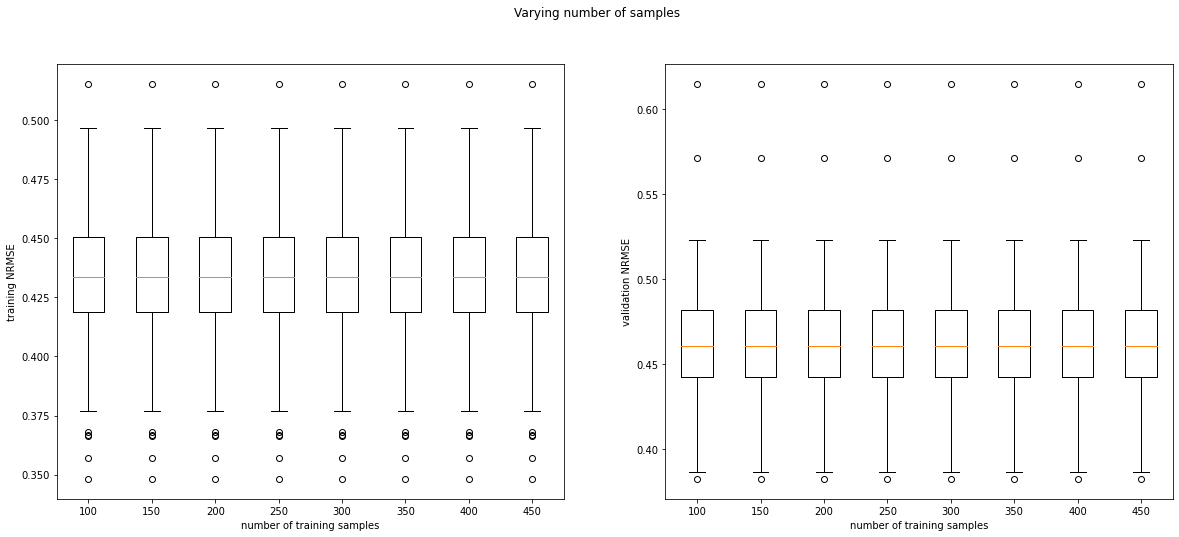

In [26]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()#generating a random weight w0 
w_r=np.random.randint(0,5,size=(b,1))#gener
a_train=80
nos_var=np.random.randint(0,10)#generating a random noise variance 
t_NRMSE=[]#calling a matrix for calculating training nrmse in each seed loop
v_NRMSE=[]#calling a matrix for calculating valiadtion nrmse in each seed loop
t_NRMSE_total=[]#calling a matrix for calculating training nrmse in overall loop
v_NRMSE_total=[]#calling a matrix for calculating validation nrmse in overall loop
a_train_samples=[100,150,200,250,300,350,400,450]#an array of no.of training samples in each iteration of loop
for a_train in a_train_samples:
   for k in range(20):
        random.seed(k)
        phia=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1))#taking training data matrix with all ones with an extra column to fit w0 in it 
                                            #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phia[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))#similalrly taking a validation data matrix withh all ones with an extra column to fit w0 in it
        phi_valid=phia[a_train:a,:]#taking validation data set from total dataset
        phi_valid_bias[:,1:]=phi_valid#making validation data set values along with a column of all ones for w0 bias
        t_train=tar_var(phi_train,w_r,w0,nos_var)#calculating training target variable using training data set
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)#calculating validation target variable using validation data set
        i=np.eye(b+1,b+1)#generating a identity matrix for using in psuedo inverse method
        w_next=np.dot(np.linalg.inv(l*i+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))#calculating the estimated 
                                                                                                                  #weight using pesudo inverse method
        y_train=np.dot(phi_train_bias,w_next)#calculating the estimated training output y using training data set and weight estimated above
        y_valid=np.dot(phi_valid_bias,w_next)#calculating the estimated validation output y using validation data set and weight estimated above
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))#calculating rmse between y,t of training samples
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))#calculating standard deviation of training t
        train_NRMSE=train_RMSE/train_stand_dev#calculating training nrmse
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))#calculating rmse between y,t of validation samples
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))#calculating standard deviation of validation t
        valid_NRMSE=valid_RMSE/valid_stand_dev#calculating validation nrmse
        t_NRMSE.append(train_NRMSE)#forming an array of nrmse of training for each random seed
        v_NRMSE.append(valid_NRMSE)#forming an array of nrmse of validation for each random seed
                                   #https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
   t_NRMSE_total.append(t_NRMSE)#forming overall array of all training nrmse values
   v_NRMSE_total.append(v_NRMSE)#forming an overall array of all validation nrmse values
fig, axs = plt.subplots(1, 2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying number of samples')#below five lines of code is written to plot the boxplot and name the axes of the plot appropriately
axs[0].boxplot(t_NRMSE_total,labels=a_train_samples)
axs[1].boxplot(v_NRMSE_total,labels=a_train_samples)
axs[0].set_xlabel("number of training samples")
axs[1].set_xlabel("number of training samples")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Q13b)Training and validation NRMSE obtained using pseudo inverse with number of variables

0.3013009397004255 0.2508735800071341


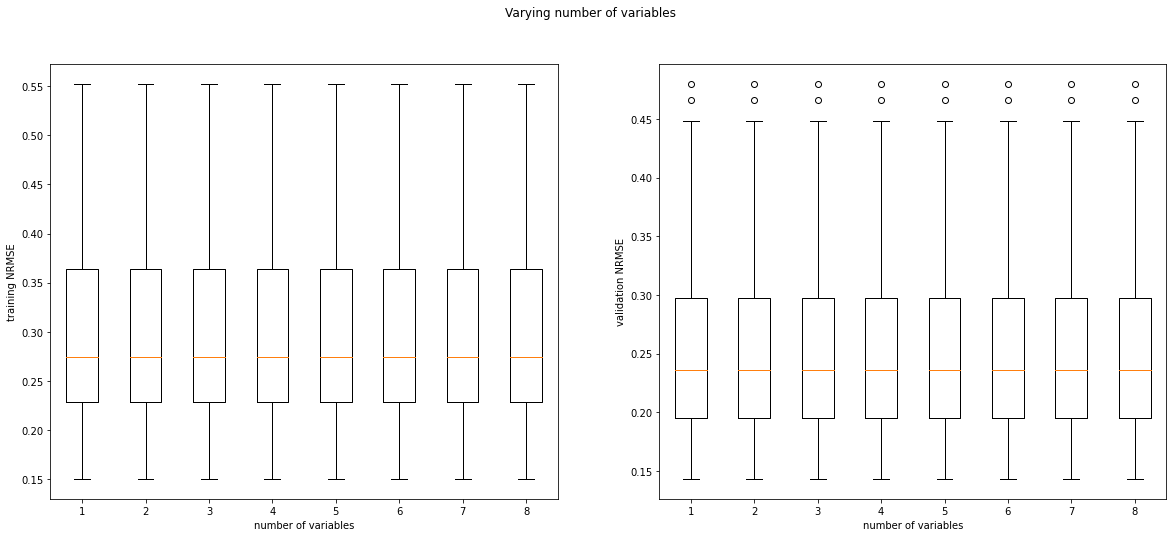

In [27]:
#training data
a=500 #total number of samples
b=10 #no.of weight vectors
i=1
w0=np.random.rand()
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
a_train=450
b_train_samples=[1,2,3,4,5,6,7,8]#here we are varying th no.of variables keeping other values constant, 
                                 #splitting the no of training and validations samples in the total samples and 
                                 #changing the no.of variables in each iteration of the loop appropriately
for b_train in b_train_samples:
   for k in range(20):
        random.seed(k)
        a_train=a-a_train
        b_valid=b-b_train
        phi_train=data_matrix(a_train,b_train)
        phi_valid=data_matrix(a_valid,b_valid)
        w=data_matrix(b,1)
        w_t=data_matrix(b_train,1)
        w_v=data_matrix(b_valid,1)
        w[0:b_train,:]=w_t
        w[b_train:b,:]=w_v
        phi_train_bias=np.ones((a_train,b_train+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b_valid+1))
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_t,w0,nos_var)
        t_valid=tar_var(phi_valid,w_v,w0,nos_var)
        i_train=np.eye(b_train+1,b_train+1)
        i_valid=np.eye(b_valid+1,b_valid+1)
        w_next_t=np.dot(np.linalg.inv(l*i_train+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        w_next_v=np.dot(np.linalg.inv(l*i_valid+np.dot(phi_valid_bias.T,phi_valid_bias)),np.dot(phi_valid_bias.T,t_valid))
        y_train=np.dot(phi_train_bias,w_next_t)
        y_valid=np.dot(phi_valid_bias,w_next_v)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
   t_NRMSE_total.append(t_NRMSE)
   v_NRMSE_total.append(v_NRMSE)
fig, axs = plt.subplots(1, 2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying number of variables')
axs[0].boxplot(t_NRMSE_total)
axs[1].boxplot(v_NRMSE_total)
axs[0].set_xlabel("number of variables")
axs[1].set_xlabel("number of variables")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))

Q13c)Training and validation NRMSE obtained using pseudo inverse with noise variance 

0.7769861583765106 0.8041750126851593


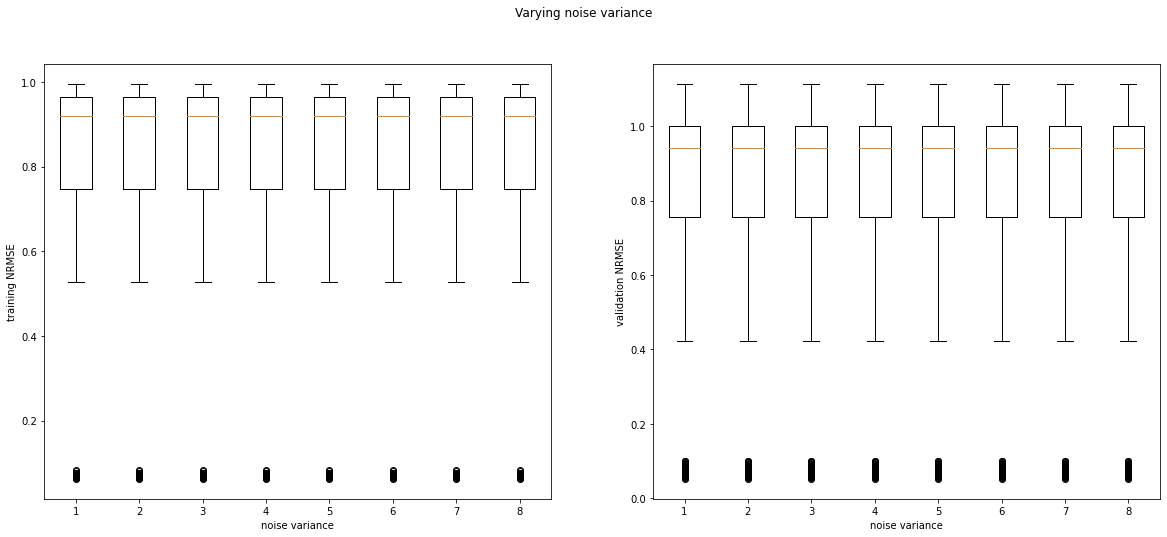

In [28]:
#training data
a=500 #total number of samples
b=10
i=1
w_r=np.random.randint(0,5,size=(b,1))
a_train=450
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
nos_var=[0.1,10,50,100,150,300,500,1000]#varying noise variance value
for nv in nos_var:
   for k in range(100):
        random.seed(k)
        phid=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phid[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phid[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        w0=np.random.rand()
        t_train=tar_var(phi_train,w_r,w0,nv)
        t_valid=tar_var(phi_valid,w_r,w0,nv)
        i=np.eye(b+1,b+1)
        w_next=np.dot(np.linalg.inv(l*i+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
   t_NRMSE_total.append(t_NRMSE)
   v_NRMSE_total.append(v_NRMSE)
        
fig,axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying noise variance')
axs[0].boxplot(t_NRMSE_total)
axs[1].boxplot(v_NRMSE_total)
axs[0].set_xlabel("noise variance")
axs[1].set_xlabel("noise variance")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Q13d)Training and validation NRMSE obtained using pseudo inverse with w0

0.1473574307188134 0.15405851227686157


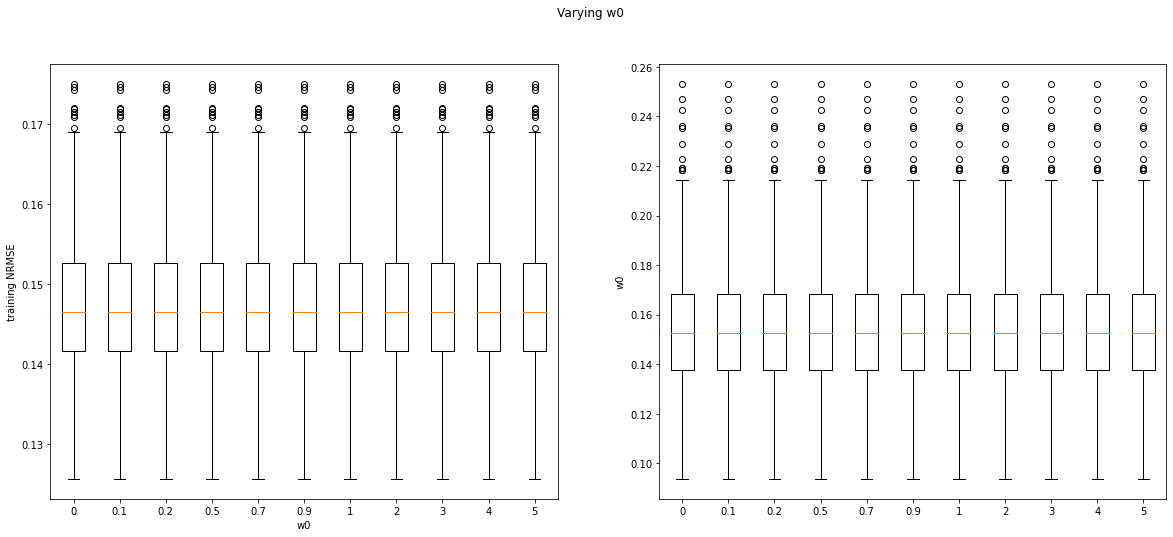

In [29]:
#training data
a=500 #total number of samples
b=10
i=1
w_r=np.random.randint(0,5,size=(b,1))
a_train=450
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
w0_vary=[0,0.1,0.2,0.5,0.7,0.9,1,2,3,4,5]#varying w0 bias values
for w0i in w0_vary:
   for k in range(1,100,1):
        random.seed(k)
        phid=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phid[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phid[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        w0=np.random.rand()
        t_train=tar_var(phi_train,w_r,w0i,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0i,nos_var)
        i=np.eye(b+1,b+1)
        w_next=np.dot(np.linalg.inv(l*i+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
   t_NRMSE_total.append(t_NRMSE)
   v_NRMSE_total.append(v_NRMSE)
fig, axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying w0')
axs[0].boxplot(t_NRMSE_total,labels=w0_vary)
axs[1].boxplot(v_NRMSE_total,labels=w0_vary)
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("w0")
axs[1].set_ylabel("w0")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Q13e)Training and validation NRMSE obtained using pseudo inverse with lambda2

0.158056439156492 0.1791265618981974


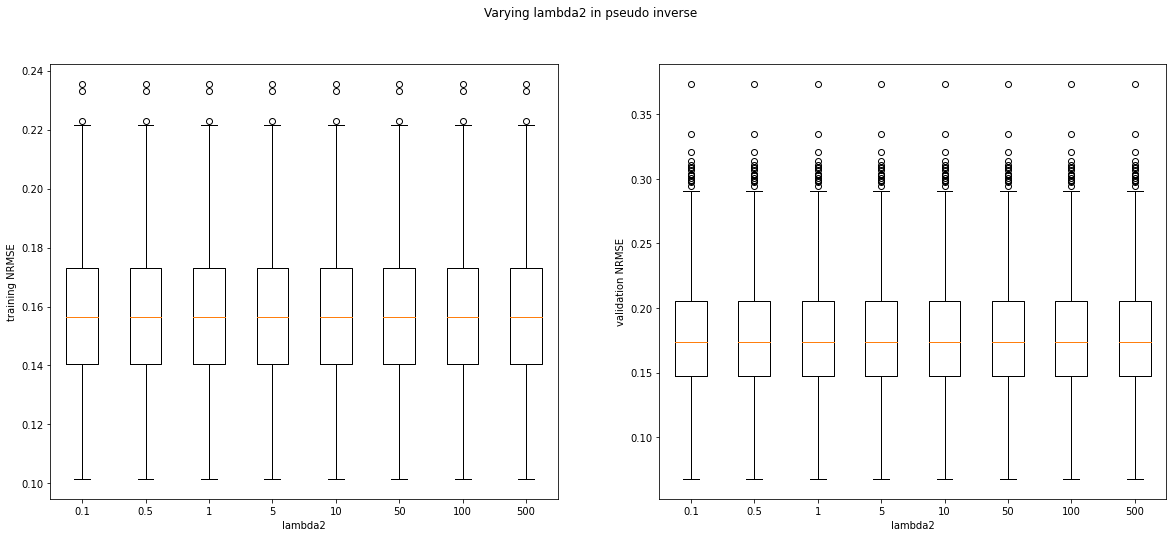

In [30]:
#training data
a=100 #total number of samples
b=10
i=1
w_r=np.random.randint(0,5,size=(b,1))
a_train=80
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
lambda2=[0.1,0.5,1,5,10,50,100,500]#varying lambda2 value
for l in lambda2: 
   for k in range(100):
        l=np.random.randint(1,100)
        random.seed(k)
        phie=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phie[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phie[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        w0=np.random.rand()
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=np.dot(np.linalg.inv(l*i+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2)
        )
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
   t_NRMSE_total.append(t_NRMSE)
   v_NRMSE_total.append(v_NRMSE)

fig, axs = plt.subplots(1, 2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying lambda2 in pseudo inverse')
axs[0].boxplot(t_NRMSE_total,labels=lambda2)
axs[1].boxplot(v_NRMSE_total,labels=lambda2)
axs[0].set_xlabel("lambda2")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[1].set_xlabel("lambda2")

fig.set_figwidth(20)
fig.set_figheight(8)
  
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

13f)Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points

0.14669819944951448 0.1476045547633512
0.4133788649996859


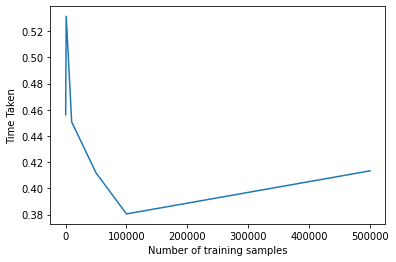

In [31]:
#training data
a=1000000 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,5,size=(b,1))
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
time_taken=[]
a_train_samples=[100,1000,10000,50000,100000,500000]#here we are calculating the time for each no.of samples and plot time takn vs no.of training samples
for a_train in a_train_samples:
        start_time=time.perf_counter() #https://stackoverflow.com/questions/52222002/what-is-the-difference-between-time-perf-counter-and-time-process-time
        phia=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phia[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phia[a_train:a,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=np.dot(np.linalg.inv(l*i+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        t_NRMSE_total.append(t_NRMSE)
        v_NRMSE_total.append(v_NRMSE)
        end_time=time.perf_counter()
        time_taken.append(1*(end_time-start_time))
fig=plt.plot(a_train_samples,time_taken)
plt.ylabel("Time Taken")
plt.xlabel("Number of training samples")
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
print(end_time-start_time)
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Observations:
When the no.of total samples were 500000 in which training and validation samples are varied , it took nearly 0:00:10.2686 ,i.e, 10 seconds

When no.of total samples were 5000000, it broke out and the simultion didnt run, hence when checked for middle value 1000000, it ran for nearly 45 seconds, hence breking point is nearly 1000000 samples where in each no.of training samples set, 20 different sample sets(data_matricies) were taken

0.15060373617021477 0.0850356726596183
7.896134363999408


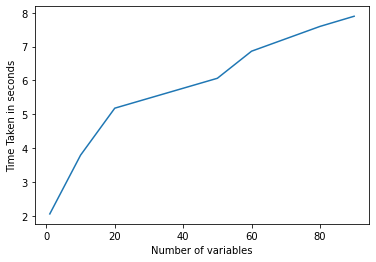

In [32]:
#training data
a=500 #total number of samples
b=100 #no.of weight vectors
i=1
w0=np.random.rand()
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
a_train=450
time_taken=[]
start_time=time.perf_counter()
b_train_samples=[1,10,20,50,60,80,90]#here we are calculating the time for each no.of variables and plot time takn vs no.of variables
for b_train in b_train_samples:    
        a_train=a-a_train
        b_valid=b-b_train
        phi_train=data_matrix(a_train,b_train)
        phi_valid=data_matrix(a_valid,b_valid)
        w=data_matrix(b,1)
        w_t=data_matrix(b_train,1)
        w_v=data_matrix(b_valid,1)
        w[0:b_train,:]=w_t
        w[b_train:b,:]=w_v
        phi_train_bias=np.ones((a_train,b_train+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b_valid+1))
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_t,w0,nos_var)
        t_valid=tar_var(phi_valid,w_v,w0,nos_var)
        i_train=np.eye(b_train+1,b_train+1)
        i_valid=np.eye(b_valid+1,b_valid+1)
        w_next_t=np.dot(np.linalg.inv(l*i_train+np.dot(phi_train_bias.T,phi_train_bias)),np.dot(phi_train_bias.T,t_train))
        w_next_v=np.dot(np.linalg.inv(l*i_valid+np.dot(phi_valid_bias.T,phi_valid_bias)),np.dot(phi_valid_bias.T,t_valid))
        y_train=np.dot(phi_train_bias,w_next_t)
        y_valid=np.dot(phi_valid_bias,w_next_v)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        t_NRMSE_total.append(t_NRMSE)
        v_NRMSE_total.append(v_NRMSE)
        end_time=time.perf_counter()
        time_taken.append(end_time-start_time)
fig= plt.plot(b_train_samples,time_taken) 
plt.xlabel("Number of variables")
plt.ylabel("Time Taken in seconds")
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
print(end_time-start_time)

Observations:
This is almost linearly increasing with no.of variables and breaking point is nearly 100 in my case

13g)Training and validation NRMSE obtained using gradient descent with max_iter

9.557029757990382 9.518982484765578
100 100


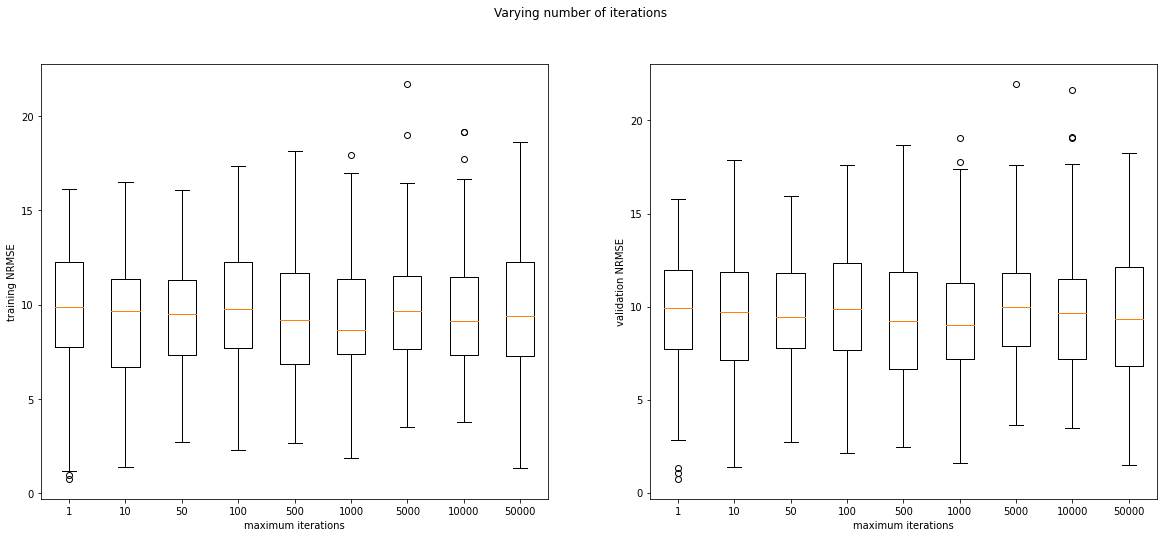

In [33]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,5,size=(b,1))
a_train=400
nos_var=np.random.rand()
max_iterations=[1,10,50,100,500,1000,5000,10000,50000]#here we are changing the no.of maximum iterations in gradient descent weight estimation 
t_NRMSE_total=[]
v_NRMSE_total=[]
for max_iter in max_iterations:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(100):
        random.seed(k)
        phig=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phig[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phig[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter,eta=0.0001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0)[0]#gradient descent is used in place of 
                                                                                                                             #pseudo inverse method
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)
fig,axs = plt.subplots(1, 2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying number of iterations')
axs[0].boxplot(t_NRMSE_total,labels=max_iterations)
axs[1].set_xlabel("maximum iterations") 
axs[0].set_ylabel("training NRMSE")  #https://stackoverflow.com/questions/6963035/how-to-set-common-axes-labels-for-subplots
axs[1].set_ylabel("validation NRMSE")
axs[1].boxplot(v_NRMSE_total,labels=max_iterations)
axs[0].set_xlabel("maximum iterations")
fig.set_figwidth(20)
fig.set_figheight(8)
#axs[1].set_xlabel("maximum iterations")
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
print(len(t_NRMSE),len(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

13h)Training and validation NRMSE obtained using gradient descent with eta

888.7820062956974 905.5642966314526


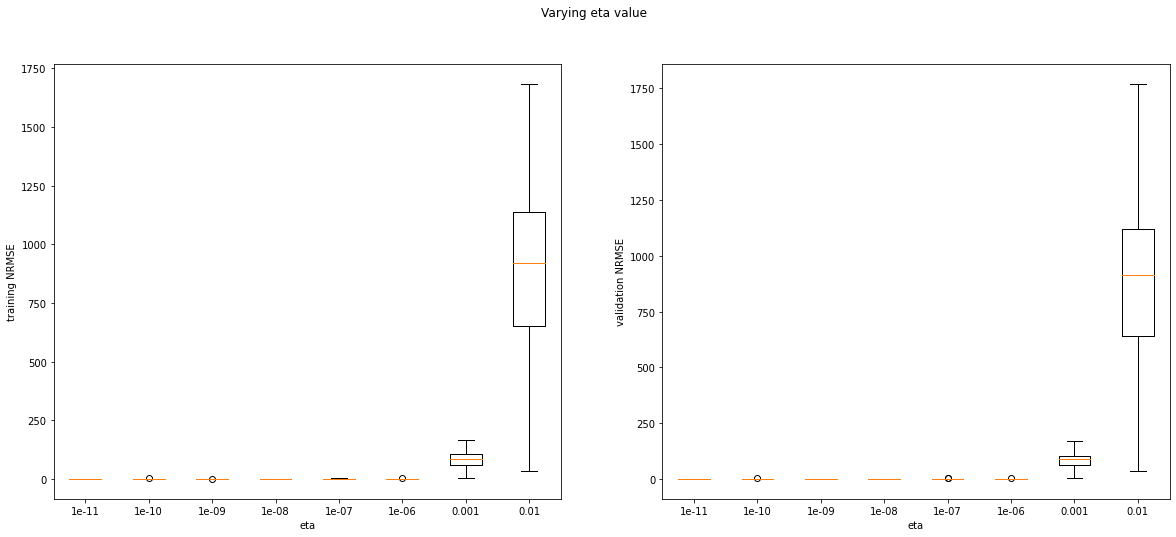

In [37]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,5,size=(b,1))
a_train=400
nos_var=0.06
t_NRMSE_total=[]
v_NRMSE_total=[]
eta=[0.00000000001,0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.001,0.01]#here we are chaning eta value in gradient descent for estimation of weights 
                                      
for e in eta:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(1,100,1):
        random.seed(k)
        phih=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phih[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phih[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=e,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0)[0]#gradient descent is used
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribut
  
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)  
fig, axs = plt.subplots(1, 2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying eta value')
axs[0].boxplot(t_NRMSE_total,labels=eta)
axs[1].boxplot(v_NRMSE_total,labels=eta)
axs[1].set_xlabel("eta")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("eta")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

13i)Time taken to solve gradient descent with number of samples and number of variables and its breaking points

80.96073175576502 80.98956105417719
0.5964903150006649


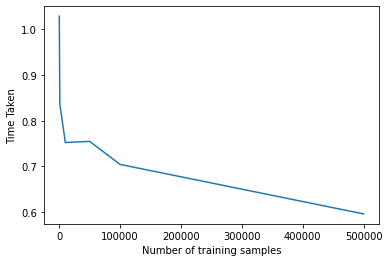

In [36]:
#training data
a=1000000 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,5,size=(b,1))
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
time_taken=[]
a_train_samples=[100,1000,10000,50000,100000,500000]#here we are calculating the time for each no.of samples and plot time takn vs no.of training samples
for a_train in a_train_samples:
        start_time=time.perf_counter() #https://stackoverflow.com/questions/52222002/what-is-the-difference-between-time-perf-counter-and-time-process-time
        phia=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phia[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phia[a_train:a,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0)[0]
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        t_NRMSE_total.append(t_NRMSE)
        v_NRMSE_total.append(v_NRMSE)
        end_time=time.perf_counter()
        time_taken.append(1*(end_time-start_time))
fig=plt.plot(a_train_samples,time_taken)
plt.ylabel("Time Taken")
plt.xlabel("Number of training samples")
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
print(end_time-start_time)
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

When the no.of samples are very low, the time taken is more than when in case with more no.of training samples, breaking point is 1000000 no.of samples in my case

4.8401951586065985 1.528025532915173
0.15716882499964413


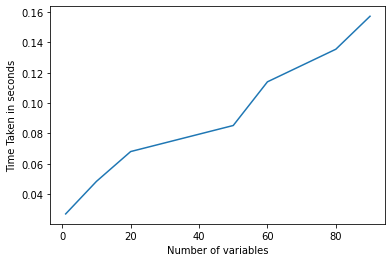

In [38]:
#training data
a=500 #total number of samples
b=100 #no.of weight vectors
i=1
w0=np.random.rand()
nos_var=np.random.rand()
t_NRMSE=[]
v_NRMSE=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
a_train=450
time_taken=[]
start_time=time.perf_counter()
b_train_samples=[1,10,20,50,60,80,90]#here we are calculating the time for each no.of variables and plot time takn vs no.of variables
for b_train in b_train_samples:    
        a_train=a-a_train
        b_valid=b-b_train
        phi_train=data_matrix(a_train,b_train)
        phi_valid=data_matrix(a_valid,b_valid)
        w=data_matrix(b,1)
        w_t=data_matrix(b_train,1)
        w_v=data_matrix(b_valid,1)
        w[0:b_train,:]=w_t
        w[b_train:b,:]=w_v
        phi_train_bias=np.ones((a_train,b_train+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b_valid+1))
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_t,w0,nos_var)
        t_valid=tar_var(phi_valid,w_v,w0,nos_var)
        i_train=np.eye(b_train+1,b_train+1)
        i_valid=np.eye(b_valid+1,b_valid+1)
        w_next_t=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0)[0]
        w_next_v=weight_iterated(phi_valid_bias,t_valid,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0)[0]
        y_train=np.dot(phi_train_bias,w_next_t)
        y_valid=np.dot(phi_valid_bias,w_next_v)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        t_NRMSE_total.append(t_NRMSE)
        v_NRMSE_total.append(v_NRMSE)
        end_time=time.perf_counter()
        time_taken.append(end_time-start_time)
fig= plt.plot(b_train_samples,time_taken) 
plt.xlabel("Number of variables")
plt.ylabel("Time Taken in seconds")
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE),np.mean(v_NRMSE))
print(end_time-start_time)

Obseravtion: It(time taken) is increasing almost linearly with no.of variables
and breaking point is nearly 1000 variables in my case

13k)Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2

0.9039121881519687 0.9725822183815565
220


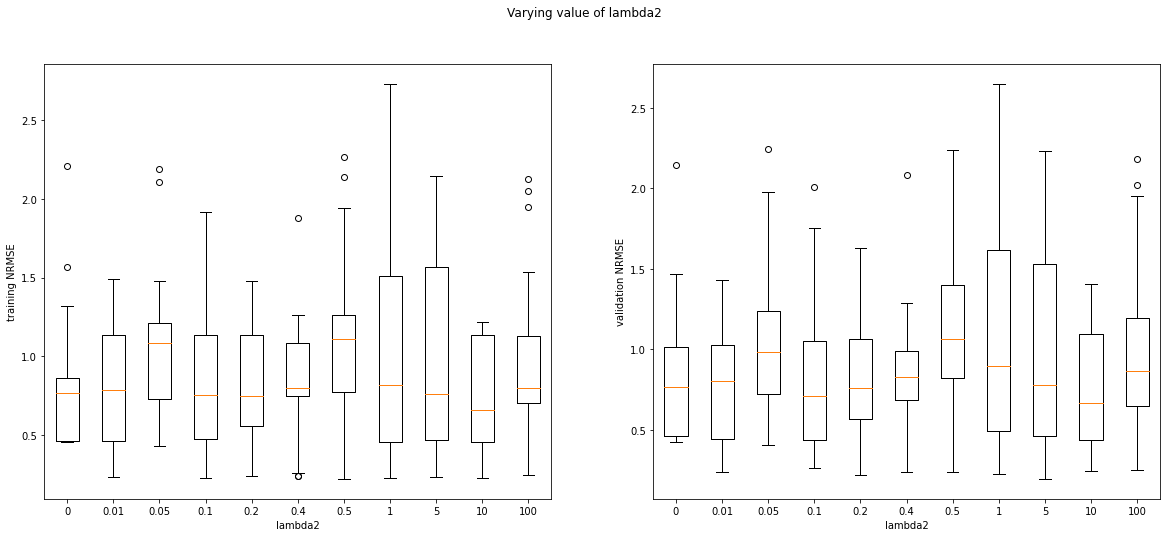

In [39]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,1,size=(b,1))
a_train=400
nos_var=np.random.rand()
var_t_NRMSE=[]
var_v_NRMSE=[]
w_least=[]
l2=[0,0.01,0.05,0.1,0.2,0.4,0.5,1,5,10,100]#changing lambda2 value in gradient descent calculation
t_NRMSE_total=[]
v_NRMSE_total=[]
for j in l2:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(20):
        random.seed(k)
        phik=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phik[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phik[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=j,lambda1=0)[0]
        if w_next.any()<=1:
          w_least.append(w_next)#checking the number of weights which are nearly zero weights
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        var_t_NRMSE.append(var_train_NRMSE)
        var_v_NRMSE.append(var_valid_NRMSE)
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)
       # plt.boxplot(v_NRMSE_total)
fig, axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying value of lambda2')
axs[0].boxplot(t_NRMSE_total,labels=l2) #https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
axs[1].boxplot(v_NRMSE_total,labels=l2)
axs[1].set_xlabel("lambda2")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("lambda2")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE_total),np.mean(v_NRMSE))
print(len(w_least))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

13l)Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

0.915865051183705 0.831156836740724
240


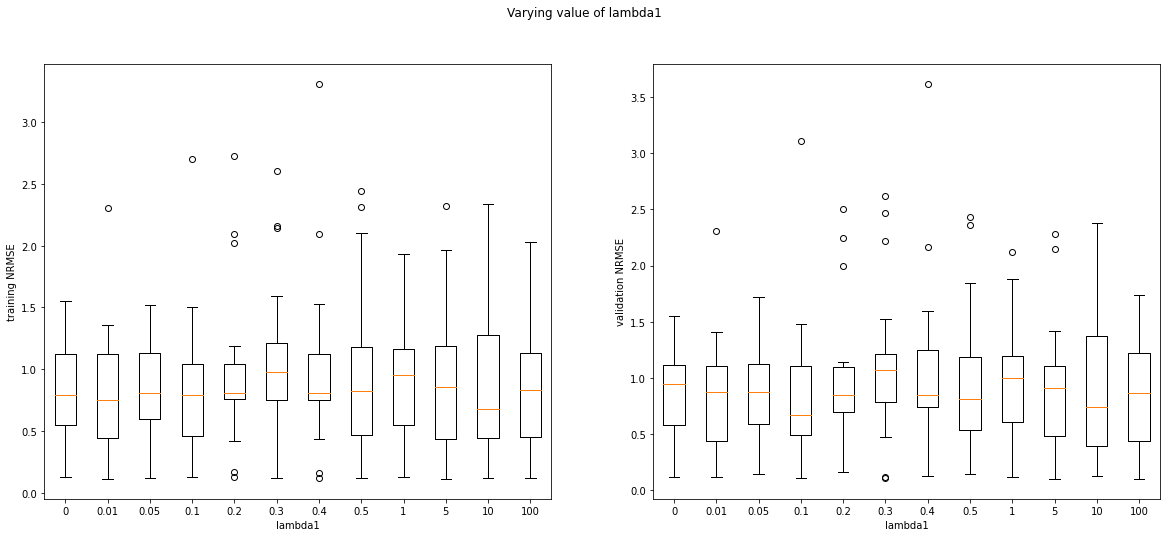

In [40]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,1,size=(b,1))
a_train=450
nos_var=np.random.rand()
var_t_NRMSE=[]
var_v_NRMSE=[]
w_least=[]
l1=[0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1,5,10,100]#changing the values of lambda1 in gradient descent
t_NRMSE_total=[]
v_NRMSE_total=[]
for j in l1:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(20):
        random.seed(k)
        phil=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phil[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phil[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nos_var)
        t_valid=tar_var(phi_valid,w_r,w0,nos_var)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=j)[0]
        if w_next.any()<=1:
          w_least.append(w_next)#see above
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        var_t_NRMSE.append(var_train_NRMSE)
        var_v_NRMSE.append(var_valid_NRMSE)
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)
       # plt.boxplot(v_NRMSE_total)
fig, axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying value of lambda1')
axs[0].boxplot(t_NRMSE_total,labels=l1) #https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
axs[1].boxplot(v_NRMSE_total,labels=l1)
axs[1].set_xlabel("lambda1")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("lambda1")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE_total),np.mean(v_NRMSE))
print(len(w_least))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

13m)Training and validation NRMSE for optimal lambda2 with noise variance

0.9996694950739384 1.0144429652456344
160


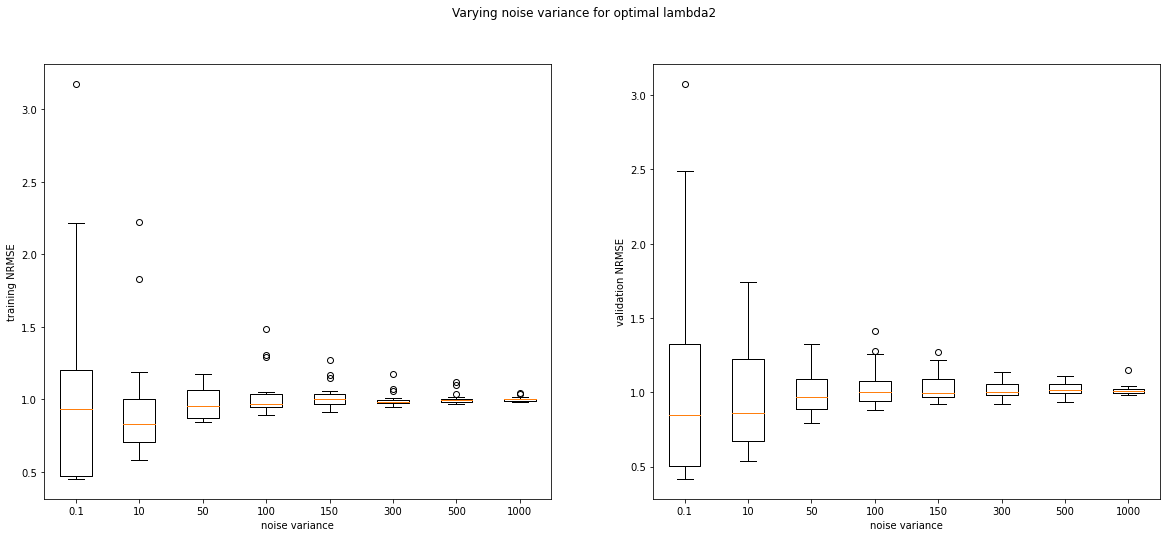

In [41]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,1,size=(b,1))
a_train=450
nos_var=np.random.rand()
var_t_NRMSE=[]
var_v_NRMSE=[]
w_least=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
nos_var=[0.1,10,50,100,150,300,500,1000]#changing the value of nosie variance for optimal lambda2
for nv in nos_var:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(20):
        random.seed(k)
        phim=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phim[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phim[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nv)
        t_valid=tar_var(phi_valid,w_r,w0,nv)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0.4,lambda1=0)[0]
        if w_next.any()<=1:
          w_least.append(w_next)
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        var_t_NRMSE.append(var_train_NRMSE)
        var_v_NRMSE.append(var_valid_NRMSE)
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)
       # plt.boxplot(v_NRMSE_total)
fig, axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying noise variance for optimal lambda2')
axs[0].boxplot(t_NRMSE_total,labels=nos_var) #https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
axs[1].boxplot(v_NRMSE_total,labels=nos_var)
axs[1].set_xlabel("noise variance")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("noise variance")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE_total),np.mean(v_NRMSE))
print(len(w_least))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Optimal value of lambda2 is nearly 0.4, where the training nrmse and valiadtion nrmse are minimum

13n)Training and validation NRMSE for optimal lambda1 with noise variance

0.9804760460601226 1.0016817497757304
160


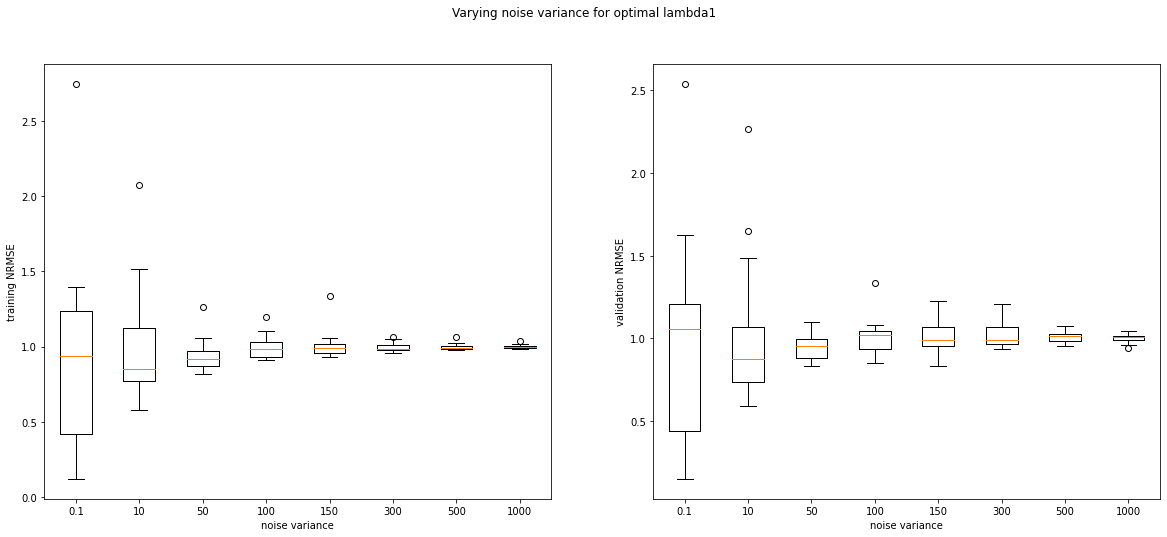

In [42]:
#training data
a=500 #total number of samples
b=10
i=1
w0=np.random.rand()
w_r=np.random.randint(0,1,size=(b,1))
a_train=450
nos_var=np.random.rand()
var_t_NRMSE=[]
var_v_NRMSE=[]
w_least=[]
t_NRMSE_total=[]
v_NRMSE_total=[]
nos_var=[0.1,10,50,100,150,300,500,1000]#changine the value of noise variance for optimal lambda1
for nv in nos_var:
  t_NRMSE=[]
  v_NRMSE=[]
  for k in range(20):
        random.seed(k)
        phim=data_matrix(a,b)
        a_valid=a-a_train
        phi_train_bias=np.ones((a_train,b+1)) #https://www.geeksforgeeks.org/numpy-ones-python/
        phi_train=phim[0:a_train,:] #taking training data set from total dataset
        phi_train_bias[:,1:]=phi_train #making training data set values along with a column of all ones for w0 bias
        phi_valid_bias=np.ones((a_valid,b+1))
        phi_valid=phim[a_train:,:]
        phi_valid_bias[:,1:]=phi_valid
        t_train=tar_var(phi_train,w_r,w0,nv)
        t_valid=tar_var(phi_valid,w_r,w0,nv)
        i=np.eye(b+1,b+1)
        w_next=weight_iterated(phi_train_bias,t_train,max_iter=1000,eta=0.00001,min_change_NRMSE=0.00000001,lambda2=0,lambda1=0.5)[0]
        if w_next.any()<=1:
          w_least.append(w_next)
        y_train=np.dot(phi_train_bias,w_next)
        y_valid=np.dot(phi_valid_bias,w_next)
        train_RMSE=np.sqrt(mean_square_error(y_train,t_train))
        train_stand_dev=np.sqrt(np.mean((t_train-np.mean(t_train))**2))
        train_NRMSE=train_RMSE/train_stand_dev
        valid_RMSE=np.sqrt(mean_square_error(y_valid,t_valid))
        valid_stand_dev=np.sqrt(np.mean((t_valid-np.mean(t_valid))**2))
        valid_NRMSE=valid_RMSE/valid_stand_dev
        var_train_NRMSE=np.mean((train_NRMSE-np.mean(train_NRMSE)**2))
        var_valid_NRMSE=np.mean((valid_NRMSE-np.mean(valid_NRMSE)**2))
        t_NRMSE.append(train_NRMSE)
        v_NRMSE.append(valid_NRMSE)#https://stackoverflow.com/questions/41452819/list-append-in-for-loop-raises-exception-nonetype-object-has-no-attribute
        var_t_NRMSE.append(var_train_NRMSE)
        var_v_NRMSE.append(var_valid_NRMSE)
  t_NRMSE_total.append(t_NRMSE)
  v_NRMSE_total.append(v_NRMSE)
       # plt.boxplot(v_NRMSE_total)
fig, axs = plt.subplots(1,2) #https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig.suptitle('Varying noise variance for optimal lambda1')
axs[0].boxplot(t_NRMSE_total,labels=nos_var) #https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
axs[1].boxplot(v_NRMSE_total,labels=nos_var)
axs[1].set_xlabel("noise variance")
axs[0].set_ylabel("training NRMSE")
axs[1].set_ylabel("validation NRMSE")
axs[0].set_xlabel("noise variance")
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show #https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
print(np.mean(t_NRMSE_total),np.mean(v_NRMSE))
print(len(w_least))
#print(np.mean(var_t_NRMSE),np.mean(var_v_NRMSE))

Optimal value of lambda1 is nearly 0.5, where the training nrmse and valiadtion nrmse are minimum

We could know from the training and validation samples that if there are many variables or many samples, then the data set may be over fitting and it may not give the exact correct results usually

If lamdba2 increases nrmse also increases due to over reguralization which is not exactly needed

If eta is more, then the nrmse increases heavily which is wrong, so eta should have a very low value

At optimal values of lambda1, and lambda2 , when the noise variance is increased, the nrmse is increased and gets constant for very high value of noise variance

All the references links used while writing code are commented just beside the code where those were used

Question 3,4,5 were discussed with Kotani Jaideep, 200070035
In Question 13a, I took the help of Nitish Kumar Reddy, 20d07072 how to approach the question and what is required and what are the plots required


Link for my demo of assignment 1- https://drive.google.com/file/d/1w0gzQyShZuQ3Vg65z-dCVXPZ3oMmDftz/view?usp=share_link